

# Information on the numpy.random package
 Reference; NumPy v1.21 Manual: https://numpy.org/doc/stable/reference/random/index.html [1]

![This is an image](https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/NumPy_logo_2020.svg/512px-NumPy_logo_2020.svg.png)
<br>



## **The overall purpose of the package**
***

   Numpy.random is a sub package of the Numpy Library. There are two combinations **Bit Generator** and **Generator**. This notebook will mainly focus on **Generator**. The package is used for generating sample random numerical data, shuffles existing data and draws samples based on a specified distribution. <br>

I will be running through the following functions of numpy.random;<br> 
   - Simple random data 
   - Permutations 
   - A selection of Distributions
   - Seed function <br>

## **Simple random data**
***

Simple random data consists of the following; 

- *integers* 
- *random*
- *choice*
- *bytes*
<br>

Lets start with **integers**; returns random integers from low(incusive) to high (exclusive) or if endpoint=true, low (inclusive to high (inclusive).[[2]]( https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers) 

In [1]:
# Importing libraries 
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt

In [36]:
# creating a varible 
rng = np.random.default_rng() # random generator
#creating varible (x), inputting arguement(10)
x = rng.integers(6, size=10) # generates an array size of 10 between 0-6 but not including 6
print("Output:",x) 

Output: [4 1 1 3 2 3 1 3 0 5]


                Visualization using a histogram            

Text(0.5, 1.0, 'Sample data (1)')

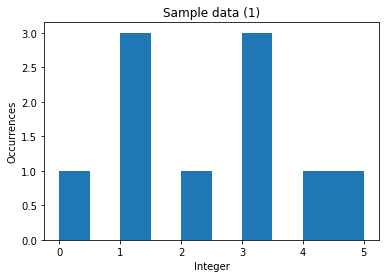

In [37]:
plt.hist (x)
plt.xlabel('Integer')
plt.ylabel('Occurrences')
plt.title ('Sample data (1)')

Output: [20 58 83 ... 82 96 21]


Text(0.5, 1.0, 'Sample data (2)')

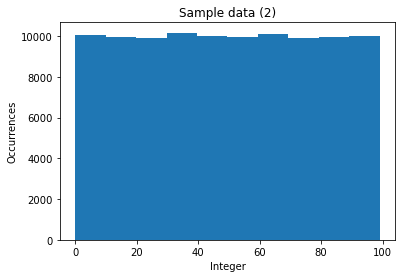

In [4]:
x = rng.integers(100, size=100000) # generates an array size of 100 between 0-100 but not including 100
print("Output:",x) 
#histogram
plt.hist (x)
plt.xlabel('Integer')
plt.ylabel('Occurrences')
plt.title ('Sample data (2)')

When using the integar function, as you can see it outputs a random number from low(inclusive - 0)to high(exclusive -100).In the above examples I have input the argument of both 6 and 100 also changing the array on each histogram to show a clear comparison of small to larger values. please note the larger sample of data shown on the plot is what we know to be a Discrete Uniform Distribution .<br>

*Generating more than one array with upper and lower bounds* [[2]](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers)


In [5]:
x = rng.integers(6, size=(3, 2)) # 3 arrays to include 2 integers between 0-6 exclusive of 6
print("Output:",(x)) 

Output: [[0 5]
 [3 5]
 [5 0]]


Generate a 1 x 3 array with 3 different upper bounds

In [6]:
x = rng.integers(1, [3, 5, 10])
print("Output:",(x)) 

Output: [1 3 6]


Generate a 1 by 3 array with 3 different lower bounds

In [7]:
x = rng.integers([1, 5, 7], 10)
print("Output:",(x)) 

Output: [1 5 8]


Generate a 2 by 4 array using broadcasting with dtype of uint8

In [8]:
x = rng.integers([1, 3, 5, 7], [[10], [20]], dtype=np.uint8)
print("Output:",(x)) 

Output: [[ 2  5  7  9]
 [ 9  4 12 14]]


<br>

**Random**

Random return random floats in the half-open interval (0.0, 1.0). [[3]](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random)

In [9]:
#creating variable rng for random generator 
rng = np.random.default_rng() # random generator 
rng.random() # outputs a random floating number

0.2712806383000489

Passing an argument; to  generate two arrays, 5 rows , 1 column of random floating numbers   

In [10]:
rng.random ((2, 5, 1))

array([[[0.84796999],
        [0.09876872],
        [0.262875  ],
        [0.7000514 ],
        [0.9218321 ]],

       [[0.32108268],
        [0.77672349],
        [0.72023276],
        [0.14035879],
        [0.26120878]]])

Passing an argument; to generate two arrays, 5 rows , 1 column of random floating numbers from -5 to 0 [[3]](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random)

In [11]:
 x = 5 * rng.random((2, 5, 1)) - 5

**Choice**

Choice generates a random sample from a give array whether it be uniform or non uniform. [[4]](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice) This function picks a random value from a list of values. 

In [12]:
#uniform sample
rng = np.random.default_rng() # random generator 
rng.choice (5,3)#Generate a uniform random sample from np.arange(5) of size 3:

array([0, 4, 3], dtype=int64)

Setting probability - from the sample below you can see between 0-4 (using 5 as the argument)the integar 1 is not likely to be selected, integars 2 and 4 are less likely to be selected compared to that of 0 and 3. 

In [13]:
#non-uniform sample (p - must equal 1.0 as here we set the probability)
rng.choice(5,3, p=[0.3, 0, 0.1, 0.5, 0.1])#Generate a non-uniform random sample from np.arange(5) of size 3:

array([3, 3, 3], dtype=int64)

You can also use the choice function when using the following type of list; 

In [14]:
aa_milne_arr = ['pooh', 'rabbit', 'piglet', 'Christopher']
rng.choice(aa_milne_arr, size= (3,3,3)) # printing list to include 3 columns, rows and sets 

array([[['Christopher', 'pooh', 'Christopher'],
        ['Christopher', 'rabbit', 'pooh'],
        ['rabbit', 'rabbit', 'pooh']],

       [['rabbit', 'pooh', 'rabbit'],
        ['piglet', 'pooh', 'piglet'],
        ['piglet', 'piglet', 'rabbit']],

       [['piglet', 'Christopher', 'piglet'],
        ['rabbit', 'Christopher', 'Christopher'],
        ['pooh', 'pooh', 'piglet']]], dtype='<U11')

<br>

## Permutations

**Shuffle**
<br>
Modify an array or sequence in-place by shuffling its contents [[5]]([10]https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html)

In [15]:
# shuffle intergar between 0-9
rng = np.random.default_rng() #random generator 
arr = np.arange(10) # value 10
rng.shuffle(arr) # shuffles array 
print ("Output:", arr)

Output: [6 3 5 4 7 2 9 8 1 0]


In [16]:
#Using reshape and axis 
arr = np.arange(9). reshape((3,3))
rng.shuffle(arr, axis = 1)
print ("Output:",arr)

Output: [[2 1 0]
 [5 4 3]
 [8 7 6]]


Above by using "reshape" provides you with an array, here an array of 3. When the "axis" is included this will display in order of integar array, i.e lowest integars will always appear within the first array. 

**Permutations**

Randomly permute a sequence, or return a permuted range.[[6]](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html)


In [17]:
#sequence range 
rng = np.random.default_rng() #random generator 
p = rng.permutation(10) #array of 10 integars between 0-9 which are arranged in several possible ways when re-run
print ("Output:", p)

Output: [2 3 4 6 0 9 1 7 8 5]


In [18]:
#permuted range 
rng = np.random.default_rng() # random generator
p = rng.permutation([1, 2, 16, 5]) #array given 
print ("output:", p)

output: [16  2  1  5]


<br>


## **Distributions**

***

**Normal Distribution** [[7]](https://ch.mathworks.com/help/stats/normal-distribution.html) [[9]](https://www.youtube.com/watch?v=mtbJbDwqWLE)

The normal distribution is one of the most commonly used distributions as it arises in many different variables in nature, take  height and weight as examples. It is also known as the bell shape curve because of it's characteristic shape, and as the Gaussian Distribution after **Johann Carl Friedrich Gauss** the german mathematician.

It it made up of three Parameters: 

- **Mean** (centre of the distribution )
- **Standard Deviation** (spread or width of the distribution) 
- **Output shape** ( sample - array ) 

Note the normal distribution is symmetric about the mean (mirror effect), with the mean determining the position of same. 
If a distribution differs to this, it is not a normal distribution. The larger the value the likely outcome of a normal distribution. The bell shape curve must also be in line with the Empirical Rule; 68.95.99.7 percentile. An Example of this will be shown below. 

Also noting the formula seen below "**mu**" equals Mean and "**sigma**" equals Standard Deviation 


Formula:

<img src="Images/nd.PNG" width=250 height=250/>

Let's take a look at a sample based on variable; height, using histogram illustrations through the liabrary Seaborn:

Output: [3.7386592  4.81344563 4.43237165 4.49280793 3.49656789]


Text(0, 0.5, 'Frequency')

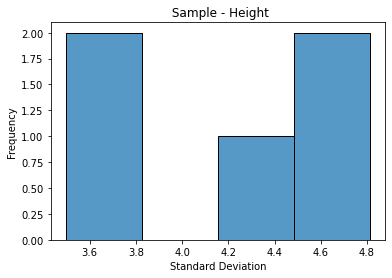

In [19]:
import seaborn as sns 

mu , sigma = (5, 1) # setting mean and standard deviation 
d = np.random.normal(mu, sigma, 5) #generating 5 values for set mu and sigma
                     
print ("Output:", d) 

# creating seaborn histogram plot
sns.histplot(d)
plt.title (" Sample - Height")
plt.xlabel("Standard Deviation")
plt.ylabel ("Frequency")

Looking at the plot above, taking the height of a population of 5, with 1 stardard deviation being 1 and the set average of 5 we can see the plot shows each person varying in height confirming the data is not a normal distribution, however when the values increase it tells another story:

Output: [5.61787449 5.54464429 5.48947532 ... 5.08158563 5.9430755  5.21127331]


Text(0, 0.5, 'Frequency')

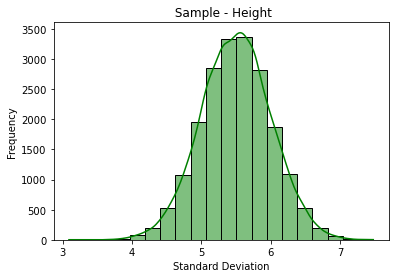

In [20]:
mu , sigma = (5.5, 0.5) # setting mean and standard deviation 
d = np.random.normal(mu, sigma, 20000) #generating 20000 values for set mu and sigma
print ("Output:", d) 

# creating seaborn histogram plot
sns.histplot(d, bins = 20, kde = True, color="green") # kde - adding curve line, bins and label) 
plt.title (" Sample - Height")
plt.xlabel("Standard Deviation")
plt.ylabel ("Frequency")

On the plot shown above I have increased the value to over 20k people setting the the mean to 5.5 with a standard deviation of 0.5. The ploy now shows a clear normal distribution; the data is clustered around the mean with the remaining data tappering off on either side. Here we can see the average height within a large size of the population is in or around 5.5 feet. 

**Empirical Rule**: [[8]](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)

In statistics, the 68–95–99.7 rule, also known as the empirical rule, is a shorthand used to remember the percentage of values that lie within an interval estimate in a normal distribution: 68%, 95%, and 99.7% of the values lie within one, two, and three standard deviations of the mean, respectively.

Lets take a look in the following example; 

Output: [6.4258408  5.46369833 5.25038015 ... 5.66902474 4.79361599 6.0962913 ]


Text(0, 0.5, 'Frequency')

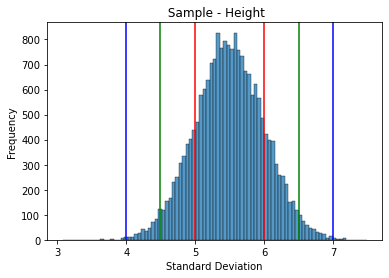

In [21]:
mu , sigma = (5.5, 0.5) # setting mean and standard deviation 
d = np.random.normal(mu, sigma, 20000) #generating 20000 values for set mu and sigma
print ("Output:", d) 

# creating seaborn histogram plot
sns.histplot(d) # kde - adding curve line, bins and label) 

#creating vertical lines for mean and standard deviation distributions on either side of mean 
plt.axvline(np.mean(d) + np.std(d), color ="r") 
plt.axvline(np.mean(d) - np.std(d), color ="r")
plt.axvline(np.mean(d) + np.std(d)*2, color ="g")
plt.axvline(np.mean(d) - np.std(d)*2, color ="g")
plt.axvline(np.mean(d) + np.std(d)*3, color ="b")
plt.axvline(np.mean(d) - np.std(d)*3, color ="b")
#creating title and labels  
plt.title (" Sample - Height")
plt.xlabel("Standard Deviation")
plt.ylabel ("Frequency")

From the above plot above we can see the distrubition by 1, 2 and 3 standard deviations away from the mean. The rule stats the following;  

- **68%** must sit within one deviation from the mean ( this is represented on the plot between the <span style='color:red'> red </span> vertical lines ) 
- **95%** must sit within two deviations from the mean (this is represented on the plot between the <span style='color:green'> green </span>  vertical lines ) 
- **99.7%** must sit within three deviations from the mean (this is represented on the plot between the<span style='color:blue'> blue </span> vertical lines )

Everything else that falls outside of this is extermely small, continuing to infinity.


**Binomial Distribution**

***
<br>

The Binomial Distribution containes two specified parameters; $n$ (trials) and $p$ probability of sucesses.The probability density for the binomial distribution is:[[]](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html)

<img src="Images/bin.PNG" width=250 height=250/>



- $N$-Number of successes 
- $n$- Number of trials
- $p$- Probability of success 

Lets take flipping a coin as an example of explaining this further. A coin has two sides, there is only two possible outcomes; heads or tails, and let say we want to know what is the probability of the coin flip being "Heads" when the coin is flipped 10 times independantly and tested over 1000 times, the probability of 1 coin flip is 50/50 so the probability of each trail in this instance is **0.5** 

In [26]:
n, p = 10, 0.5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 1000) # testing 1000 times 

Text(0, 0.5, 'Probability')

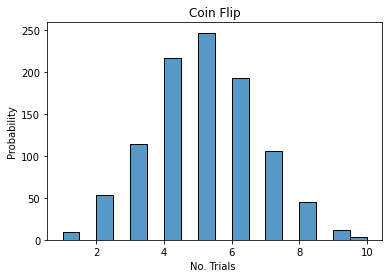

In [30]:
#plotting using seaborn library 
sns.histplot(s, binwidth=0.5) #plotting to include binwidth 
#histogram labels 
plt.title("Coin Flip")
plt.xlabel("No. Trials ")
plt.ylabel ("Probability")

As you can see from the above plot that each time the formula runs it returns a variant of in or around 250 within the mean 5 (no trials) which have landed on heads. Also showing a "*Normal Distribution*",  which you would expect given the probability of 0.5. in this instance.

**Geometric  Distribution**

***

The Geometric Distribution are bernoulli trails where there is one of two outcomes; success or failure. The purpose of the Geometric Distribution is to identify the number of trails needed to acheive the first success. Its uses a single parameter $p$ (success). Here is the probability function of this distribution; [[]]((https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.geometric.html)

<img src="Images/Geo.PNG" width=250 height=250/>

This distribution differs to the binomical distribution mentioned above, as it relates to the probability as to when a sucess will appear and not the probability of how many times that success will appear. Both however are discrete probability distributions. 

Lets continue with our example of the coin flip to give a visualisation and comparison. 


Text(0, 0.5, 'Success')

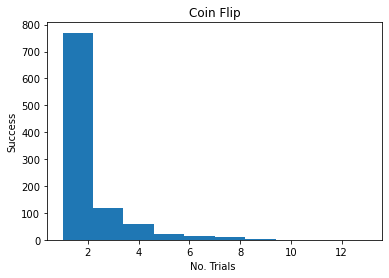

In [24]:
# Coin Flip 
p = 0.5 # probability 
s = np.random.default_rng().geometric(p, 1000) # random generator of 1000
plt.hist(s)
plt.title("Coin Flip")
plt.xlabel("No. Trials ")
plt.ylabel ("Success")

As you can see above the Geometric Distribution is skewed to the right which shows that the probability of getting a success (heads) is highly likely to occur within the first independant flips of the coin.

**Uniform Distribution**

***

The uniform distribution are samples of uniformly distributed over the half-open interval; low, high (includes low, but excludes high).[[]](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html) The Uniform distribution being discussed here is a  **continuous probability distribution** as is the Normal distribution mentioned above but differs to that of the **Discrete probability distribution** mentioned at the beginning of this notebook, under the section integars.

What is the difference between continuous and discrete Uniform distributions? 

The answer is - an exact exertion; The continuous distribution describes an experiment where there is an arbitrary outcome that lies between certain bounds. The bounds are defined by the parameters, a and b, which are the minimum and maximum values[[]](https://en.wikipedia.org/wiki/Continuous_uniform_distribution). The Discrete distribution is wherein a finite number of values are equally likely to be observed; every one of n values has equal probability 1/n. A simple example of the discrete uniform distribution is throwing a fair dice. The possible values are 1, 2, 3, 4, 5, 6, and each time the die is thrown the probability of a given score is 1/6 [[]](https://en.wikipedia.org/wiki/Discrete_uniform_distribution)



Here is the probability function of this distribution: [[]](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html)

<img src="Images/Geo.PNG" width=250 height=250/>


Lets look at a visualisation of the sample data provided by the reference page noted above; 

Text(0.5, 0, 'Min - Max value')

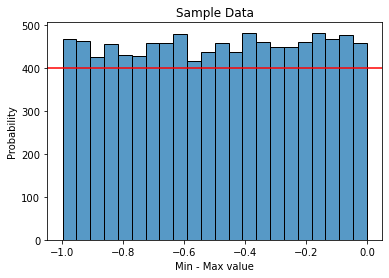

In [46]:
# Generating samples between -1 , 0 over 10000 times 
s = np.random.default_rng().uniform(-1, 0, 10000)
# simple seaborn plot
sns.histplot(s)
plt.axhline(400, color = "r") # adding red horizontial line 
plt.title("Sample Data")
plt.ylabel("Probability")
plt.xlabel ("Min - Max value")

As we can see the samples shown in the above plot, are equally likely to occur between the min and max values. 

## References 

[2] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers

[3]https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html

[4]https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html

[5]https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html

[6]https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html


[7]https://ch.mathworks.com/help/stats/normal-distribution.html

[8] https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule

[] https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html

[] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.geometric.html

[] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html


[]https://en.wikipedia.org/wiki/Continuous_uniform_distribution

[]https://en.wikipedia.org/wiki/Discrete_uniform_distribution